In [1]:
import numpy as np 
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

filename = 'EEG.machinelearing_data_BRMH.csv'
df = pd.read_csv(filename)
df.head(10)

,no.,sex,age,eeg.date,education,IQ,main.disorder,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
0,1,M,57.0,2012.8.30,NaN,NaN,Addictive disorder,Alcohol use disorder,35.998557,21.717375,...,55.989192,16.739679,23.452271,45.678820,30.167520,16.918761,48.850427,9.422630,34.507082,28.613029
1,2,M,37.0,2012.9.6,6.0,120.0,Addictive disorder,Alcohol use disorder,13.425118,11.002916,...,45.595619,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261
2,3,M,32.0,2012.9.10,16.0,113.0,Addictive disorder,Alcohol use disorder,29.941780,27.544684,...,99.475453,70.654171,39.131547,69.920996,71.063644,38.534505,69.908764,27.180532,64.803155,31.485799
3,4,M,35.0,2012.10.8,18.0,126.0,Addictive disorder,Alcohol use disorder,21.496226,21.846832,...,59.986561,63.822201,36.478254,47.117006,84.658376,24.724096,50.299349,35.319695,79.822944,41.141873
4,5,M,36.0,2012.10.18,16.0,112.0,Addictive disorder,Alcohol use disorder,37.775667,33.607679,...,61.462720,59.166097,51.465531,58.635415,80.685608,62.138436,75.888749,61.003944,87.455509,70.531662
5,6,F,24.0,2012.11.21,14.0,105.0,Addictive disorder,Alcohol use disorder,13.482096,14.095855,...,92.841723,82.302355,83.938567,88.213886,90.972026,77.443894,89.545596,72.579530,89.462863,86.127823
6,7,F,26.0,2012.12.3,16.0,103.0,Addictive disorder,Alcohol use disorder,21.780747,26.655328,...,73.017845,50.593309,56.250644,46.572808,69.617082,51.808149,56.495169,52.526873,62.801103,56.710212
7,8,M,23.0,2013.1.17,12.0,104.0,Addictive disorder,Alcohol use disorder,11.704212,10.600361,...,91.645799,63.962652,58.120225,69.767127,80.165627,58.648915,79.533814,35.510554,45.811328,60.417464
8,9,M,24.0,2013.2.15,17.0,89.0,Addictive disorder,Alcohol use disorder,8.531635,8.668278,...,47.703314,34.685504,38.526848,75.189718,47.003045,32.248734,77.707001,33.095903,67.985045,65.377007
9,10,F,30.0,2013.2.8,12.0,98.0,Addictive disorder,Alcohol use disorder,14.853668,12.614058,...,83.249851,39.820829,70.283171,64.150040,63.783769,45.423004,61.922878,19.639653,54.220350,53.456534


In [2]:
df.shape

(945, 1149)

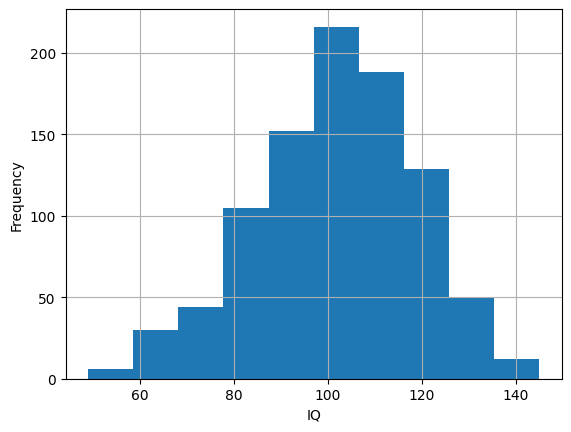

In [14]:
df['IQ'].hist()
plt.ylabel('Frequency')
plt.xlabel('IQ')
plt.show()

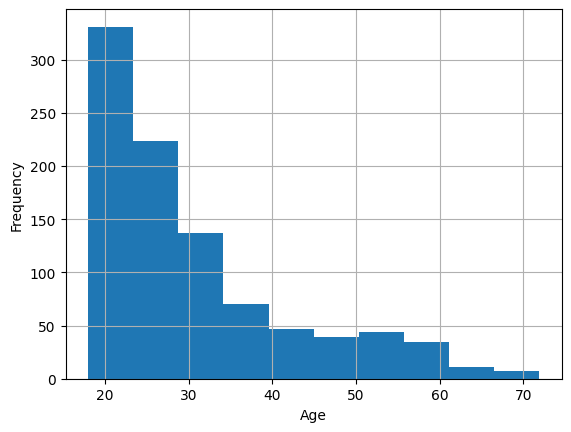

In [3]:
df['age'].hist()
plt.ylabel('Frequency')
plt.xlabel('Age')
plt.show()

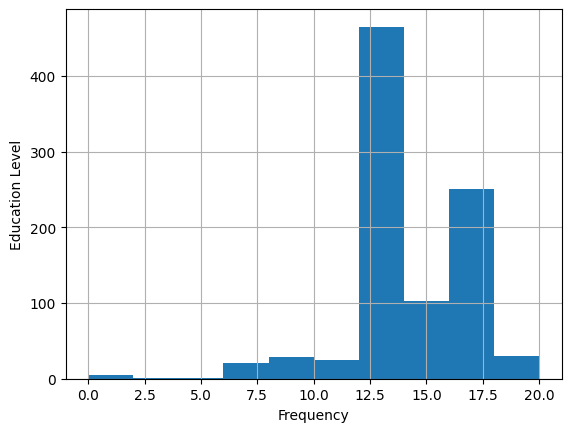

In [16]:
df['education'].hist()
plt.xlabel('Frequency')
plt.ylabel('Education Level')
plt.show()

In [17]:
disorders = df.groupby('specific.disorder')
disorders_list = list(disorders.groups.keys())
print(disorders_list)

['Acute stress disorder', 'Adjustment disorder', 'Alcohol use disorder', 'Behavioral addiction disorder', 'Bipolar disorder', 'Depressive disorder', 'Healthy control', 'Obsessive compulsitve disorder', 'Panic disorder', 'Posttraumatic stress disorder', 'Schizophrenia', 'Social anxiety disorder']


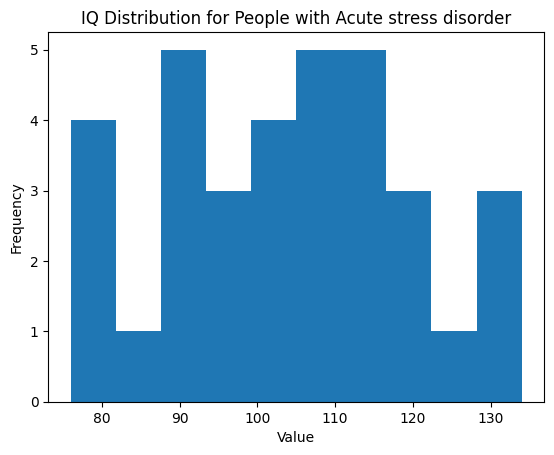

104.05882352941177
15.434988149656471


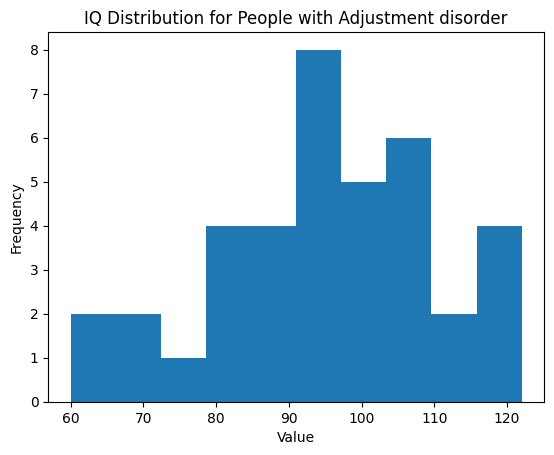

94.23684210526316
15.405218860391358


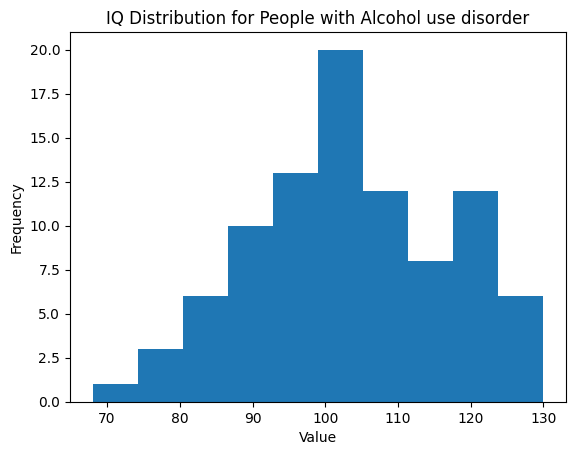

103.38461538461539
13.611081458192013


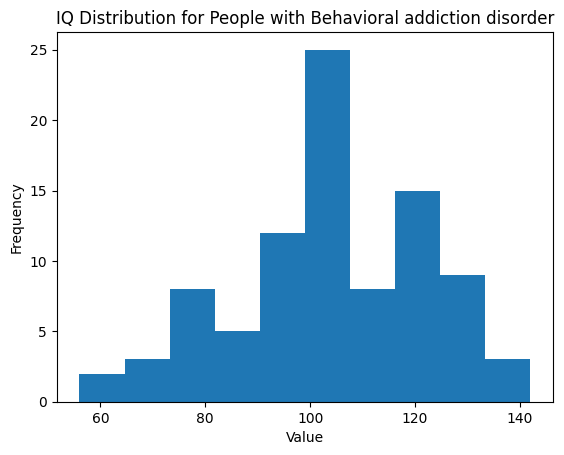

104.37777777777778
18.492985477206616


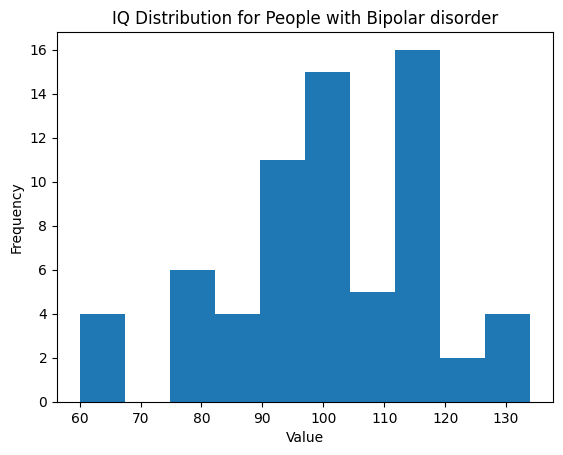

100.80597014925372
16.97702440820155


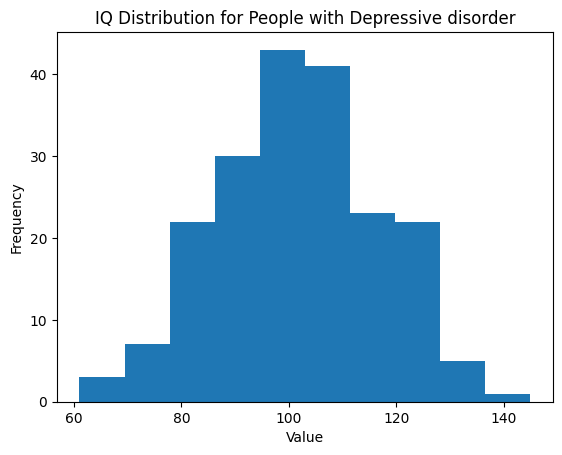

101.84771573604061
15.283616590390084


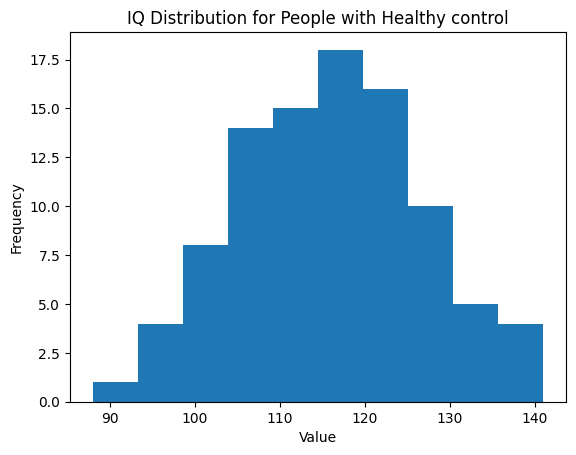

116.2421052631579
10.935707459893772


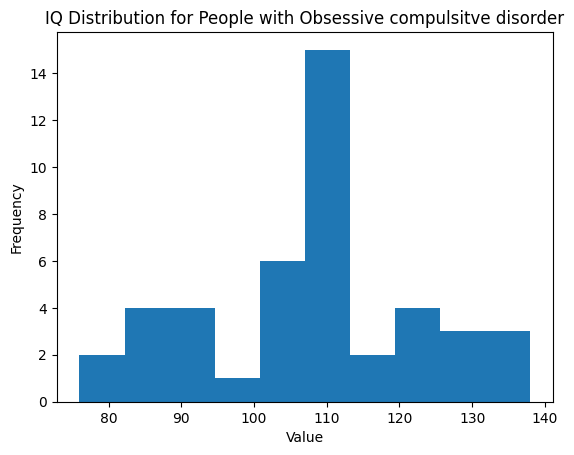

107.79545454545455
15.235484201637668


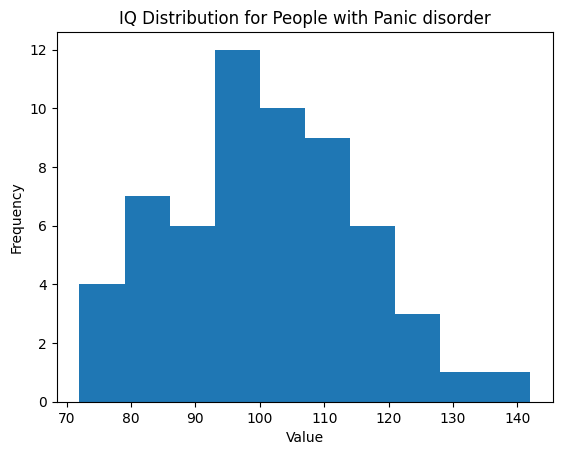

100.30508474576271
14.768622653412917


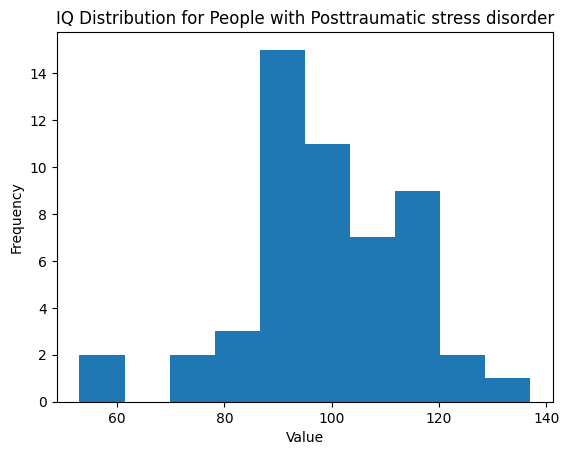

98.90384615384616
15.688461621659998


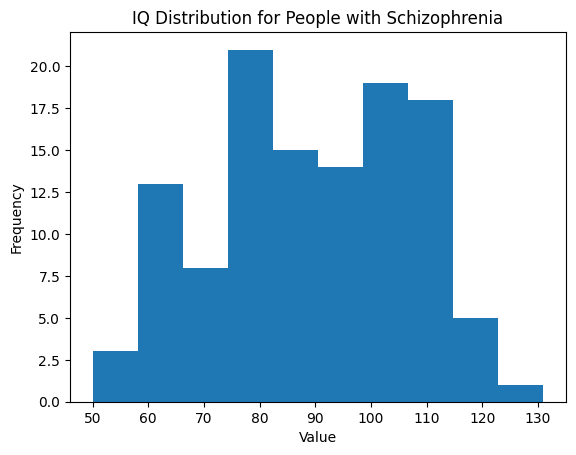

89.62393162393163
17.505036957739797


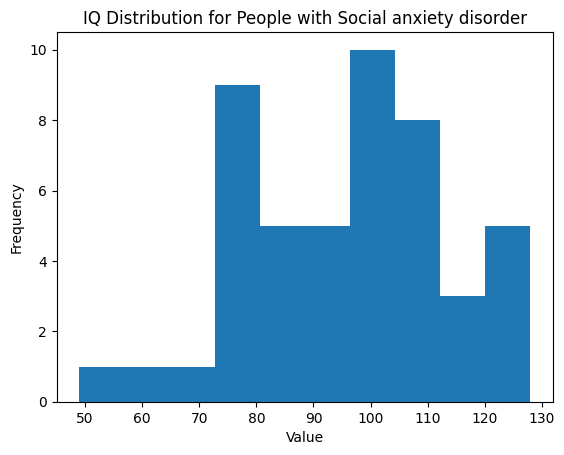

95.85416666666667
17.886152474878713


In [18]:
for d in disorders_list:
    invitro = df[df['specific.disorder'] == d]
    plt.hist(invitro['IQ'], label = d)
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.title(f"IQ Distribution for People with {d}")
    plt.show()
    print(invitro['IQ'].mean())
    print(invitro['IQ'].std())

In [19]:
df.drop(['no.','sex','eeg.date','education','IQ','main.disorder'], axis = 1, inplace = True)
df.dropna(axis = 1, inplace=True)
df.head(10)

,age,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,AB.A.delta.g.F8,AB.A.delta.h.T3,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
0,57.0,Alcohol use disorder,35.998557,21.717375,21.518280,26.825048,26.611516,25.732649,16.563408,29.891368,...,55.989192,16.739679,23.452271,45.678820,30.167520,16.918761,48.850427,9.422630,34.507082,28.613029
1,37.0,Alcohol use disorder,13.425118,11.002916,11.942516,15.272216,14.151570,12.456034,8.436832,9.975238,...,45.595619,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261
2,32.0,Alcohol use disorder,29.941780,27.544684,17.150159,23.608960,27.087811,13.541237,16.523963,12.775574,...,99.475453,70.654171,39.131547,69.920996,71.063644,38.534505,69.908764,27.180532,64.803155,31.485799
3,35.0,Alcohol use disorder,21.496226,21.846832,17.364316,13.833701,14.100954,13.100939,14.613650,8.063191,...,59.986561,63.822201,36.478254,47.117006,84.658376,24.724096,50.299349,35.319695,79.822944,41.141873
4,36.0,Alcohol use disorder,37.775667,33.607679,21.865556,21.771413,22.854536,21.456377,15.969042,9.434306,...,61.462720,59.166097,51.465531,58.635415,80.685608,62.138436,75.888749,61.003944,87.455509,70.531662
5,24.0,Alcohol use disorder,13.482096,14.095855,12.854630,11.727480,13.128924,11.627138,14.978119,6.899770,...,92.841723,82.302355,83.938567,88.213886,90.972026,77.443894,89.545596,72.579530,89.462863,86.127823
6,26.0,Alcohol use disorder,21.780747,26.655328,17.687564,28.340610,34.357498,30.449621,17.911285,10.661723,...,73.017845,50.593309,56.250644,46.572808,69.617082,51.808149,56.495169,52.526873,62.801103,56.710212
7,23.0,Alcohol use disorder,11.704212,10.600361,9.208001,16.623509,16.483356,14.705948,9.939374,7.620754,...,91.645799,63.962652,58.120225,69.767127,80.165627,58.648915,79.533814,35.510554,45.811328,60.417464
8,24.0,Alcohol use disorder,8.531635,8.668278,6.936891,7.355228,9.103691,7.529840,7.113072,4.797183,...,47.703314,34.685504,38.526848,75.189718,47.003045,32.248734,77.707001,33.095903,67.985045,65.377007
9,30.0,Alcohol use disorder,14.853668,12.614058,21.729442,19.998095,17.081762,28.024453,12.010140,14.668044,...,83.249851,39.820829,70.283171,64.150040,63.783769,45.423004,61.922878,19.639653,54.220350,53.456534


In [20]:
df.dtypes
missing_values = df.isnull().sum()
print(missing_values)
df = pd.get_dummies(df, columns=['specific.disorder'])
df.head(10)

age                      0
specific.disorder        0
AB.A.delta.a.FP1         0
AB.A.delta.b.FP2         0
AB.A.delta.c.F7          0
                        ..
COH.F.gamma.p.P4.r.O1    0
COH.F.gamma.p.P4.s.O2    0
COH.F.gamma.q.T6.r.O1    0
COH.F.gamma.q.T6.s.O2    0
COH.F.gamma.r.O1.s.O2    0
Length: 1142, dtype: int64


,age,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,AB.A.delta.g.F8,AB.A.delta.h.T3,AB.A.delta.i.C3,...,specific.disorder_Alcohol use disorder,specific.disorder_Behavioral addiction disorder,specific.disorder_Bipolar disorder,specific.disorder_Depressive disorder,specific.disorder_Healthy control,specific.disorder_Obsessive compulsitve disorder,specific.disorder_Panic disorder,specific.disorder_Posttraumatic stress disorder,specific.disorder_Schizophrenia,specific.disorder_Social anxiety disorder
0,57.0,35.998557,21.717375,21.518280,26.825048,26.611516,25.732649,16.563408,29.891368,22.402246,...,True,False,False,False,False,False,False,False,False,False
1,37.0,13.425118,11.002916,11.942516,15.272216,14.151570,12.456034,8.436832,9.975238,14.834740,...,True,False,False,False,False,False,False,False,False,False
2,32.0,29.941780,27.544684,17.150159,23.608960,27.087811,13.541237,16.523963,12.775574,21.686306,...,True,False,False,False,False,False,False,False,False,False
3,35.0,21.496226,21.846832,17.364316,13.833701,14.100954,13.100939,14.613650,8.063191,11.015078,...,True,False,False,False,False,False,False,False,False,False
4,36.0,37.775667,33.607679,21.865556,21.771413,22.854536,21.456377,15.969042,9.434306,15.244523,...,True,False,False,False,False,False,False,False,False,False
5,24.0,13.482096,14.095855,12.854630,11.727480,13.128924,11.627138,14.978119,6.899770,9.751346,...,True,False,False,False,False,False,False,False,False,False
6,26.0,21.780747,26.655328,17.687564,28.340610,34.357498,30.449621,17.911285,10.661723,30.532273,...,True,False,False,False,False,False,False,False,False,False
7,23.0,11.704212,10.600361,9.208001,16.623509,16.483356,14.705948,9.939374,7.620754,17.939082,...,True,False,False,False,False,False,False,False,False,False
8,24.0,8.531635,8.668278,6.936891,7.355228,9.103691,7.529840,7.113072,4.797183,6.656886,...,True,False,False,False,False,False,False,False,False,False
9,30.0,14.853668,12.614058,21.729442,19.998095,17.081762,28.024453,12.010140,14.668044,34.792466,...,True,False,False,False,False,False,False,False,False,False


In [21]:
df.shape

(945, 1153)

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

X_names = [col for col in df.columns if col not in ['specific.disorder_Acute stress disorder','specific.disorder_Adjustment disorder','specific.disorder_Alcohol use disorder','specific.disorder_Behavioral addiction disorder', 'specific.disorder_Bipolar disorder','specific.disorder_Depressive disorder','specific.disorder_Healthy control','specific.disorder_Obsessive compulsitve disorder', 'specific.disorder_Panic disorder','specific.disorder_Posttraumatic stress disorder','specific.disorder_Schizophrenia','specific.disorder_Social anxiety disorder']]
X = df[X_names]

y = df[['specific.disorder_Acute stress disorder','specific.disorder_Adjustment disorder','specific.disorder_Alcohol use disorder','specific.disorder_Behavioral addiction disorder', 'specific.disorder_Bipolar disorder','specific.disorder_Depressive disorder','specific.disorder_Healthy control','specific.disorder_Obsessive compulsitve disorder', 'specific.disorder_Panic disorder','specific.disorder_Posttraumatic stress disorder','specific.disorder_Schizophrenia','specific.disorder_Social anxiety disorder']]
y.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, Flatten, BatchNormalization,Dropout

model = Sequential([
    Dense(256, activation='relu', input_dim=X.shape[1]),
    BatchNormalization(),  
    Dropout(0.3),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.8),
    Dense(32, activation='relu'),
    Dense(y.shape[1], activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

X_train_tf = tf.convert_to_tensor(X_train, dtype=float)
y_train_tf = tf.convert_to_tensor(y_train,dtype=float)

history = model.fit(X_train_tf, y_train_tf,validation_data=(X_test,y_test), epochs=50, batch_size = 1024)

X_test_tf = tf.convert_to_tensor(X_test, dtype=float)
y_test_tf = tf.convert_to_tensor(y_test, dtype=bool)
y_pred = model.predict(X_test_tf)


Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 0.8808 - accuracy: 0.1296 - val_loss: 3.5172 - val_accuracy: 0.2275
Epoch 2/50
1/1 [==============================] - 0s 50ms/step - loss: 0.8828 - accuracy: 0.1243 - val_loss: 3.3020 - val_accuracy: 0.1111
Epoch 3/50
1/1 [==============================] - 0s 50ms/step - loss: 0.8462 - accuracy: 0.1310 - val_loss: 3.2419 - val_accuracy: 0.1270
Epoch 4/50
1/1 [==============================] - 0s 51ms/step - loss: 0.8122 - accuracy: 0.1415 - val_loss: 2.8240 - val_accuracy: 0.1587
Epoch 5/50
1/1 [==============================] - 0s 50ms/step - loss: 0.7979 - accuracy: 0.1323 - val_loss: 2.3096 - val_accuracy: 0.1958
Epoch 6/50
1/1 [==============================] - 0s 50ms/step - loss: 0.7939 - accuracy: 0.1283 - val_loss: 1.9083 - val_accuracy: 0.2169
Epoch 7/50
1/1 [==============================] - 0s 54ms/step - loss: 0.7608 - accuracy: 0.1548 - val_loss: 1.6409 - val_accuracy: 0.2222
Epoch 8/50
1/1 [=============

In [23]:
# Evaluate on training data
train_loss, train_accuracy = model.evaluate(X_train_tf, y_train_tf, verbose=0)
print(f"Training Loss: {train_loss:.4f}")
print(f"Training Accuracy: {train_accuracy:.4f}")
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(X_test_tf, y_test_tf, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Loss: 0.5829
Training Accuracy: 0.0463
Test Loss: 0.5637
Test Accuracy: 0.0423


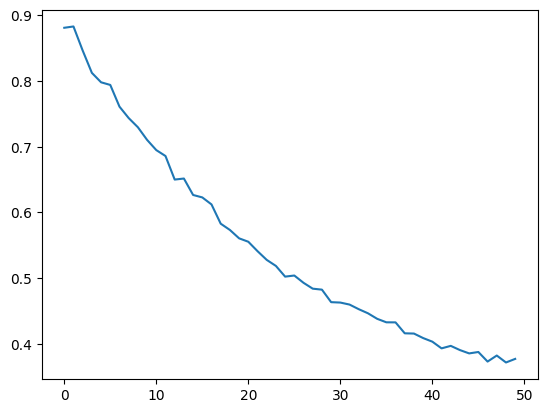

In [24]:
x = history.history['loss']
plt.plot(range(len(x)),x)

In [25]:
y

,specific.disorder_Acute stress disorder,specific.disorder_Adjustment disorder,specific.disorder_Alcohol use disorder,specific.disorder_Behavioral addiction disorder,specific.disorder_Bipolar disorder,specific.disorder_Depressive disorder,specific.disorder_Healthy control,specific.disorder_Obsessive compulsitve disorder,specific.disorder_Panic disorder,specific.disorder_Posttraumatic stress disorder,specific.disorder_Schizophrenia,specific.disorder_Social anxiety disorder
0,False,False,True,False,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
940,False,False,False,False,False,False,True,False,False,False,False,False
941,False,False,False,False,False,False,True,False,False,False,False,False
942,False,False,False,False,False,False,True,False,False,False,False,False
943,False,False,False,False,False,False,True,False,False,False,False,False


In [26]:
y_train_tf

<tf.Tensor: shape=(756, 12), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               292352    
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 batch_normalization_1 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 128)               0

# Plotting the Training Loss vs Validation Loss

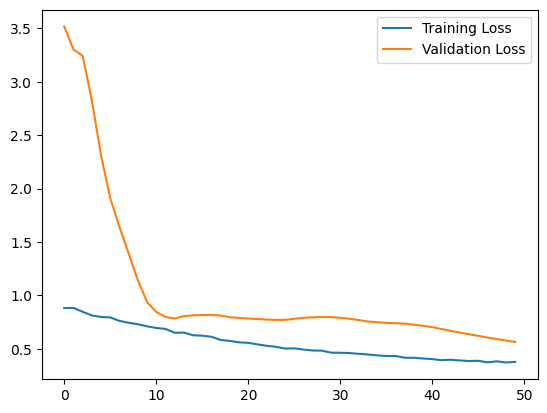

In [28]:
plt.plot(range(len(history.history["loss"])),history.history["loss"],label="Training Loss")
plt.plot(range(len(history.history["val_loss"])),history.history["val_loss"],label="Validation Loss")
plt.legend()

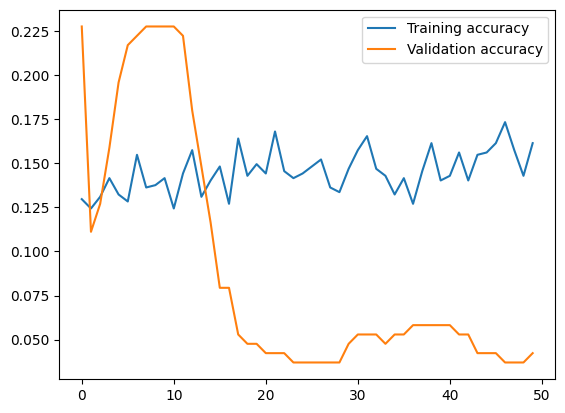

In [29]:
plt.plot(range(len(history.history["accuracy"])),history.history["accuracy"],label="Training accuracy")
plt.plot(range(len(history.history["val_accuracy"])),history.history["val_accuracy"],label="Validation accuracy")
plt.legend()

In [30]:
age_df = df['age'].value_counts()

In [31]:
age_df

age
23.00    23
21.00    22
20.00    22
25.00    18
22.00    17
         ..
37.03     1
51.05     1
25.96     1
21.37     1
52.98     1
Name: count, Length: 654, dtype: int64

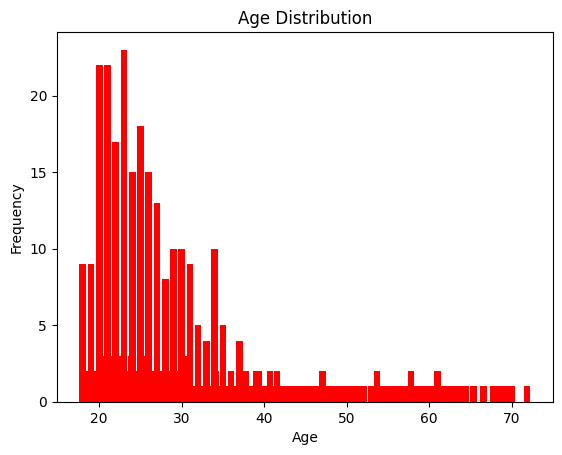

In [32]:
plt.bar(age_df.index, age_df.values, color='red')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution")
plt.show()

# Dropping the age column to ensure that the model isn't just learning the individual data points because the batch size was set to capture the entire dataset.

In [33]:
df = df.drop(['age'], axis = 1)
df.head(10)

,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,AB.A.delta.g.F8,AB.A.delta.h.T3,AB.A.delta.i.C3,AB.A.delta.j.Cz,...,specific.disorder_Alcohol use disorder,specific.disorder_Behavioral addiction disorder,specific.disorder_Bipolar disorder,specific.disorder_Depressive disorder,specific.disorder_Healthy control,specific.disorder_Obsessive compulsitve disorder,specific.disorder_Panic disorder,specific.disorder_Posttraumatic stress disorder,specific.disorder_Schizophrenia,specific.disorder_Social anxiety disorder
0,35.998557,21.717375,21.518280,26.825048,26.611516,25.732649,16.563408,29.891368,22.402246,22.582176,...,True,False,False,False,False,False,False,False,False,False
1,13.425118,11.002916,11.942516,15.272216,14.151570,12.456034,8.436832,9.975238,14.834740,10.950564,...,True,False,False,False,False,False,False,False,False,False
2,29.941780,27.544684,17.150159,23.608960,27.087811,13.541237,16.523963,12.775574,21.686306,18.367666,...,True,False,False,False,False,False,False,False,False,False
3,21.496226,21.846832,17.364316,13.833701,14.100954,13.100939,14.613650,8.063191,11.015078,11.639560,...,True,False,False,False,False,False,False,False,False,False
4,37.775667,33.607679,21.865556,21.771413,22.854536,21.456377,15.969042,9.434306,15.244523,17.041979,...,True,False,False,False,False,False,False,False,False,False
5,13.482096,14.095855,12.854630,11.727480,13.128924,11.627138,14.978119,6.899770,9.751346,14.141171,...,True,False,False,False,False,False,False,False,False,False
6,21.780747,26.655328,17.687564,28.340610,34.357498,30.449621,17.911285,10.661723,30.532273,32.822336,...,True,False,False,False,False,False,False,False,False,False
7,11.704212,10.600361,9.208001,16.623509,16.483356,14.705948,9.939374,7.620754,17.939082,14.969926,...,True,False,False,False,False,False,False,False,False,False
8,8.531635,8.668278,6.936891,7.355228,9.103691,7.529840,7.113072,4.797183,6.656886,7.869283,...,True,False,False,False,False,False,False,False,False,False
9,14.853668,12.614058,21.729442,19.998095,17.081762,28.024453,12.010140,14.668044,34.792466,20.083606,...,True,False,False,False,False,False,False,False,False,False


In [34]:
target_categories = [i for i in df.columns if "specific" in i] #Checking all of the categories to estimate.
target_categories

['specific.disorder_Acute stress disorder',
 'specific.disorder_Adjustment disorder',
 'specific.disorder_Alcohol use disorder',
 'specific.disorder_Behavioral addiction disorder',
 'specific.disorder_Bipolar disorder',
 'specific.disorder_Depressive disorder',
 'specific.disorder_Healthy control',
 'specific.disorder_Obsessive compulsitve disorder',
 'specific.disorder_Panic disorder',
 'specific.disorder_Posttraumatic stress disorder',
 'specific.disorder_Schizophrenia',
 'specific.disorder_Social anxiety disorder']

In [35]:
X_names_1 = [col for col in df.columns if col not in target_categories]
X = df[X_names_1]
X.astype(float)


,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,AB.A.delta.g.F8,AB.A.delta.h.T3,AB.A.delta.i.C3,AB.A.delta.j.Cz,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
0,35.998557,21.717375,21.518280,26.825048,26.611516,25.732649,16.563408,29.891368,22.402246,22.582176,...,55.989192,16.739679,23.452271,45.678820,30.167520,16.918761,48.850427,9.422630,34.507082,28.613029
1,13.425118,11.002916,11.942516,15.272216,14.151570,12.456034,8.436832,9.975238,14.834740,10.950564,...,45.595619,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261
2,29.941780,27.544684,17.150159,23.608960,27.087811,13.541237,16.523963,12.775574,21.686306,18.367666,...,99.475453,70.654171,39.131547,69.920996,71.063644,38.534505,69.908764,27.180532,64.803155,31.485799
3,21.496226,21.846832,17.364316,13.833701,14.100954,13.100939,14.613650,8.063191,11.015078,11.639560,...,59.986561,63.822201,36.478254,47.117006,84.658376,24.724096,50.299349,35.319695,79.822944,41.141873
4,37.775667,33.607679,21.865556,21.771413,22.854536,21.456377,15.969042,9.434306,15.244523,17.041979,...,61.462720,59.166097,51.465531,58.635415,80.685608,62.138436,75.888749,61.003944,87.455509,70.531662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,41.851823,36.771496,43.671792,36.860889,24.732236,23.607823,23.288260,7.520642,17.636528,20.220791,...,82.905657,34.850706,63.970519,63.982003,51.244725,62.203684,62.062237,31.013031,31.183413,98.325230
941,18.986856,19.401387,27.586436,20.194732,19.407491,20.216570,16.465027,13.178851,12.687296,20.257619,...,65.917918,66.700117,44.756285,49.787513,98.905995,54.021304,93.902401,52.740396,92.807331,56.320868
942,28.781317,32.369230,11.717778,23.134370,26.209302,25.484497,22.586688,11.368466,21.799254,36.083181,...,61.040959,27.632209,45.552852,33.638817,46.690983,19.382928,41.050717,7.045821,41.962451,19.092111
943,19.929100,25.196375,14.445391,16.453456,16.590649,16.007279,18.909188,13.438102,17.442777,18.859586,...,99.113664,48.328934,41.248470,28.192238,48.665743,42.007147,28.735945,27.176500,27.529522,20.028446


In [36]:
X.dtypes

AB.A.delta.a.FP1         float64
AB.A.delta.b.FP2         float64
AB.A.delta.c.F7          float64
AB.A.delta.d.F3          float64
AB.A.delta.e.Fz          float64
                          ...   
COH.F.gamma.p.P4.r.O1    float64
COH.F.gamma.p.P4.s.O2    float64
COH.F.gamma.q.T6.r.O1    float64
COH.F.gamma.q.T6.s.O2    float64
COH.F.gamma.r.O1.s.O2    float64
Length: 1140, dtype: object

In [37]:
y = df[target_categories]
y = y.astype(float)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential([
    Dense(256, activation='relu', input_dim=X.shape[1]),
    BatchNormalization(),  
    Dropout(0.3),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.8),
    Dense(32, activation='relu'),
    Dense(y.shape[1], activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

X_train_tf = tf.convert_to_tensor(X_train, dtype=float)
y_train_tf = tf.convert_to_tensor(y_train,dtype=float)

history = model.fit(X_train_tf, y_train_tf,validation_data=(X_test,y_test), epochs=50, batch_size = 1024)

X_test_tf = tf.convert_to_tensor(X_test, dtype=float)
y_test_tf = tf.convert_to_tensor(y_test, dtype=bool)
y_pred = model.predict(X_test_tf)

Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 1.1633 - accuracy: 0.0648 - val_loss: 6.9696 - val_accuracy: 0.0370
Epoch 2/50
1/1 [==============================] - 0s 50ms/step - loss: 1.1456 - accuracy: 0.0503 - val_loss: 6.0880 - val_accuracy: 0.0688
Epoch 3/50
1/1 [==============================] - 0s 50ms/step - loss: 1.0910 - accuracy: 0.0873 - val_loss: 4.6576 - val_accuracy: 0.0582
Epoch 4/50
1/1 [==============================] - 0s 49ms/step - loss: 1.0708 - accuracy: 0.0701 - val_loss: 3.4157 - val_accuracy: 0.0582
Epoch 5/50
1/1 [==============================] - 0s 51ms/step - loss: 1.0530 - accuracy: 0.0675 - val_loss: 2.8045 - val_accuracy: 0.0529
Epoch 6/50
1/1 [==============================] - 0s 50ms/step - loss: 1.0211 - accuracy: 0.0622 - val_loss: 2.6432 - val_accuracy: 0.0582
Epoch 7/50
1/1 [==============================] - 0s 49ms/step - loss: 0.9684 - accuracy: 0.0913 - val_loss: 2.5513 - val_accuracy: 0.0582
Epoch 8/50
1/1 [=============

# The model performs notably worse with the age column removed

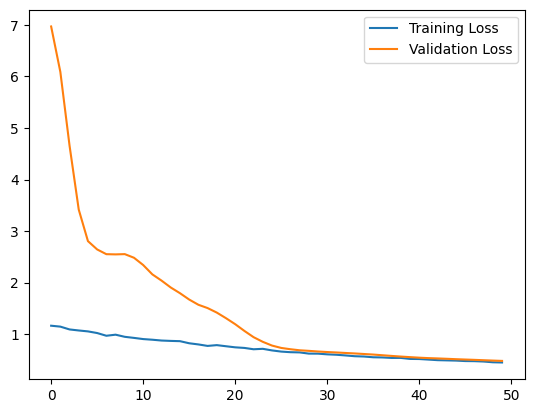

In [39]:
plt.plot(range(len(history.history["loss"])),history.history["loss"],label="Training Loss")
plt.plot(range(len(history.history["val_loss"])),history.history["val_loss"],label="Validation Loss")
plt.legend()

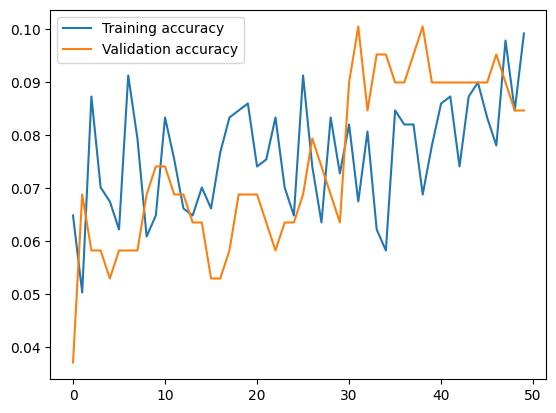

In [40]:
plt.plot(range(len(history.history["accuracy"])),history.history["accuracy"],label="Training accuracy")
plt.plot(range(len(history.history["val_accuracy"])),history.history["val_accuracy"],label="Validation accuracy")
plt.legend()

# However it improves if the linear layers are increased in size, dropout parameters are tweaked, and regularization is introduced to the layers to prevent overfitting. 

In [41]:
from tensorflow.keras.regularizers import l1_l2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential([
    Dense(1024, activation='relu', input_dim=X.shape[1]),
    BatchNormalization(),  
    Dropout(0.2),
    Dense(512, activation='relu',kernel_regularizer=l1_l2(l1=1e-2, l2=3e-2)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(256, activation='relu',kernel_regularizer=l1_l2(l1=1e-2, l2=3e-2)),
    Dense(y.shape[1], activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

X_train_tf = tf.convert_to_tensor(X_train, dtype=float)
y_train_tf = tf.convert_to_tensor(y_train,dtype=float)

history = model.fit(X_train_tf, y_train_tf,validation_data=(X_test,y_test), epochs=150, batch_size = 1024)

X_test_tf = tf.convert_to_tensor(X_test, dtype=float)
y_test_tf = tf.convert_to_tensor(y_test, dtype=bool)
y_pred = model.predict(X_test_tf)

Epoch 1/150
1/1 [==============================] - 2s 2s/step - loss: 253.1251 - accuracy: 0.0833 - val_loss: 249.1250 - val_accuracy: 0.1111
Epoch 2/150
1/1 [==============================] - 0s 97ms/step - loss: 245.2449 - accuracy: 0.0966 - val_loss: 240.3554 - val_accuracy: 0.1058
Epoch 3/150
1/1 [==============================] - 0s 92ms/step - loss: 237.5224 - accuracy: 0.1283 - val_loss: 232.0958 - val_accuracy: 0.0952
Epoch 4/150
1/1 [==============================] - 0s 95ms/step - loss: 229.9651 - accuracy: 0.1111 - val_loss: 224.2094 - val_accuracy: 0.1005
Epoch 5/150
1/1 [==============================] - 0s 99ms/step - loss: 222.6005 - accuracy: 0.1376 - val_loss: 216.5895 - val_accuracy: 0.0952
Epoch 6/150
1/1 [==============================] - 0s 100ms/step - loss: 215.3883 - accuracy: 0.1627 - val_loss: 209.3036 - val_accuracy: 0.1005
Epoch 7/150
1/1 [==============================] - 0s 91ms/step - loss: 208.3326 - accuracy: 0.1720 - val_loss: 202.2280 - val_accuracy: 

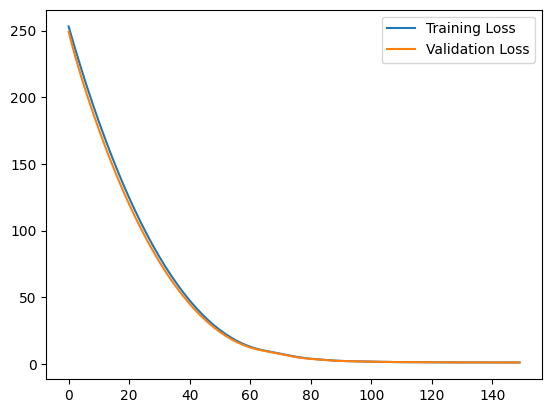

In [42]:
plt.plot(range(len(history.history["loss"])),history.history["loss"],label="Training Loss")
plt.plot(range(len(history.history["val_loss"])),history.history["val_loss"],label="Validation Loss")
plt.legend()

# Accuracy Comparisons

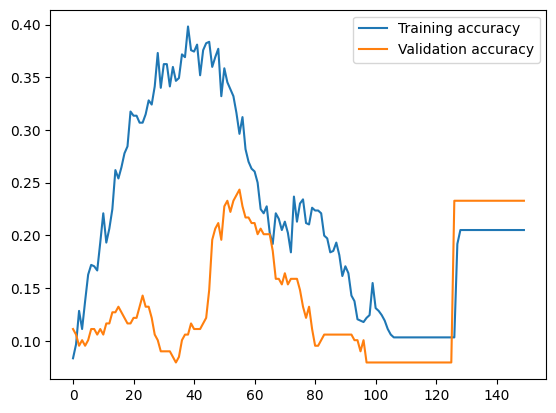

In [43]:
plt.plot(range(len(history.history["accuracy"])),history.history["accuracy"],label="Training accuracy")
plt.plot(range(len(history.history["val_accuracy"])),history.history["val_accuracy"],label="Validation accuracy")
plt.legend()

# ROC Curves 

In [44]:
acute_stress_y = y_test[target_categories[0]]
acute_stress_y

848    0.0
333    0.0
280    0.0
30     0.0
168    0.0
      ... 
424    0.0
541    0.0
850    0.0
109    0.0
77     0.0
Name: specific.disorder_Acute stress disorder, Length: 189, dtype: float64

In [45]:
y_pred_acute = model.predict(X_test)
y_pred_acute = y_pred_acute[:,0]
y_pred_acute

6/6 [==============================] - 0s 4ms/step


array([0.06849312, 0.06849244, 0.06849002, 0.068481  , 0.06848975,
       0.06850161, 0.06848458, 0.06849165, 0.06848652, 0.06849481,
       0.06848519, 0.06848592, 0.06849239, 0.06849413, 0.0684881 ,
       0.06849116, 0.06849134, 0.06848915, 0.06849906, 0.06849056,
       0.06849043, 0.06848868, 0.06849603, 0.06847996, 0.06849548,
       0.06848828, 0.06848674, 0.06849393, 0.06849308, 0.068495  ,
       0.06849446, 0.06848986, 0.06849674, 0.06849605, 0.06848913,
       0.06848508, 0.06849051, 0.0684934 , 0.06848937, 0.0684881 ,
       0.06848343, 0.06848418, 0.06849027, 0.06849539, 0.06848385,
       0.06848901, 0.06849223, 0.06849703, 0.0684898 , 0.06848888,
       0.06848089, 0.06848872, 0.0684838 , 0.06849188, 0.06848913,
       0.06849461, 0.06848722, 0.06848267, 0.06849465, 0.06849243,
       0.06848837, 0.06848531, 0.06849612, 0.06848487, 0.06849118,
       0.06848652, 0.06849569, 0.06849918, 0.06849364, 0.06849144,
       0.06849106, 0.06848952, 0.06848887, 0.06849016, 0.06849

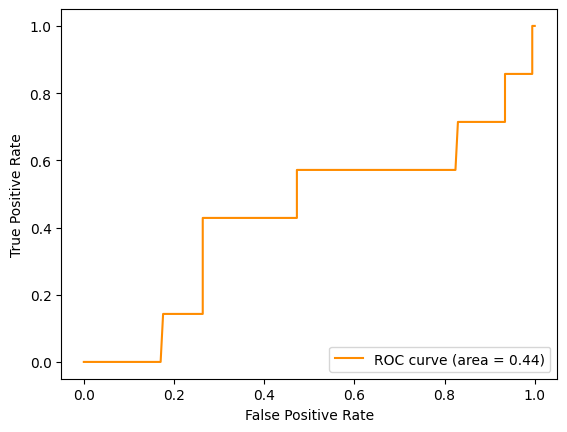

In [46]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(acute_stress_y, y_pred_acute)
                        
roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

6/6 [==============================] - 0s 4ms/step


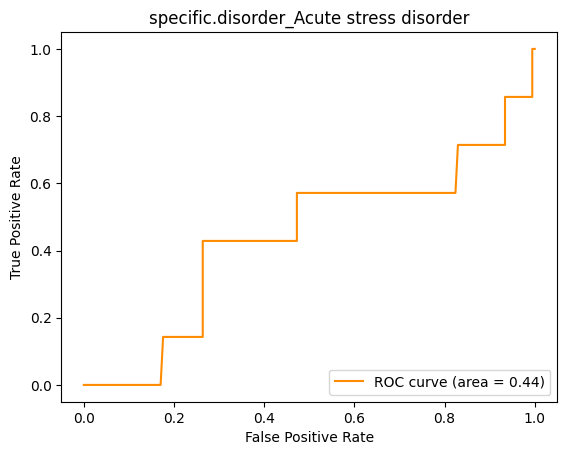

6/6 [==============================] - 0s 4ms/step


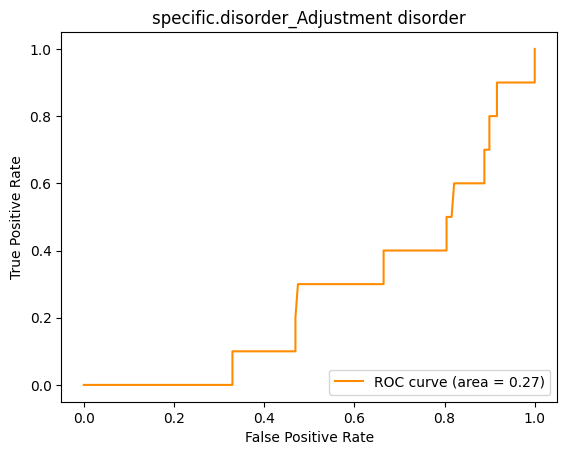

6/6 [==============================] - 0s 4ms/step


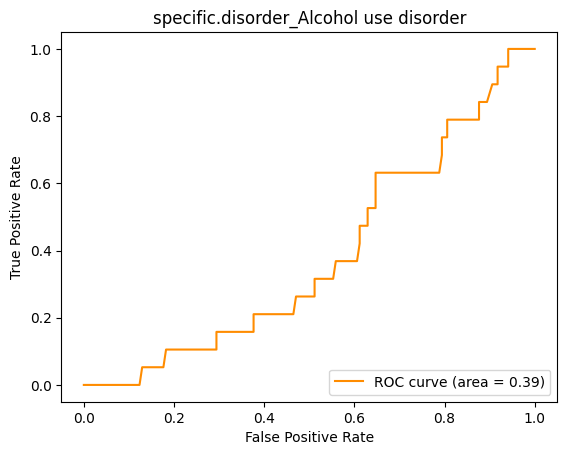

6/6 [==============================] - 0s 4ms/step


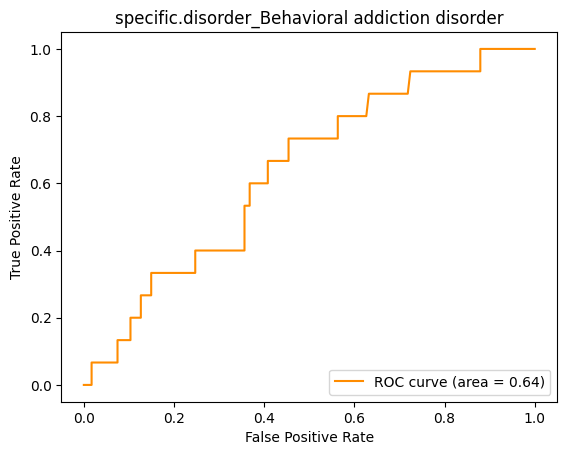

6/6 [==============================] - 0s 4ms/step


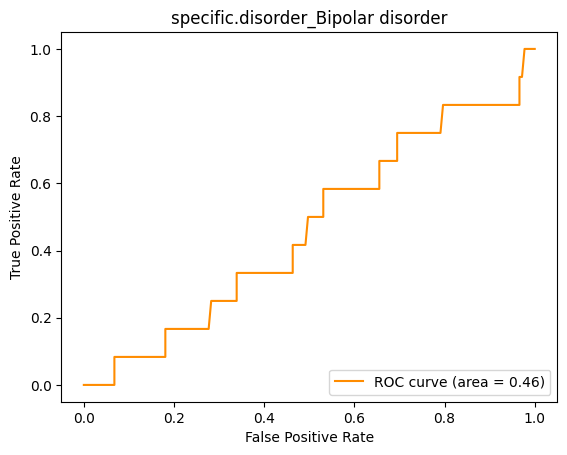

6/6 [==============================] - 0s 4ms/step


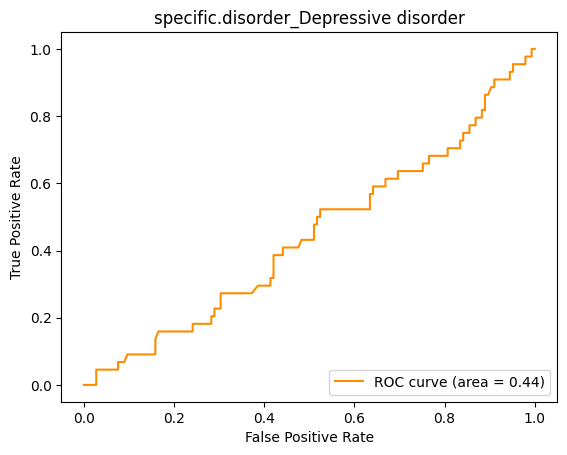

6/6 [==============================] - 0s 4ms/step


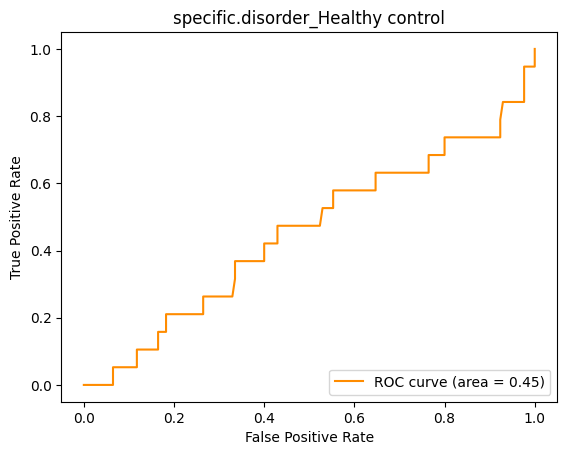

6/6 [==============================] - 0s 4ms/step


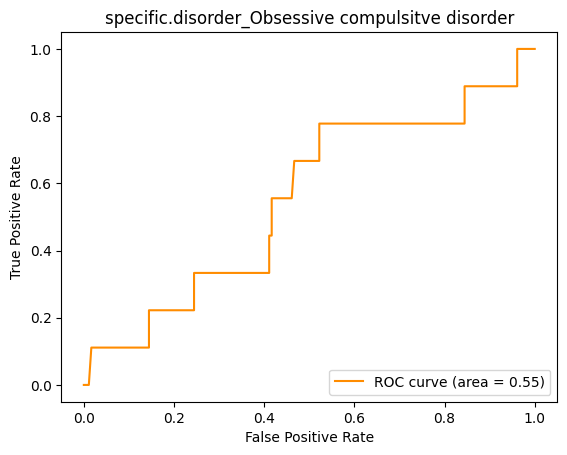

6/6 [==============================] - 0s 4ms/step


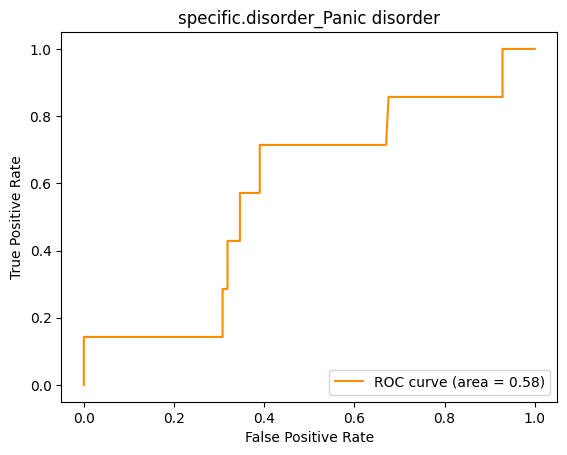

6/6 [==============================] - 0s 4ms/step


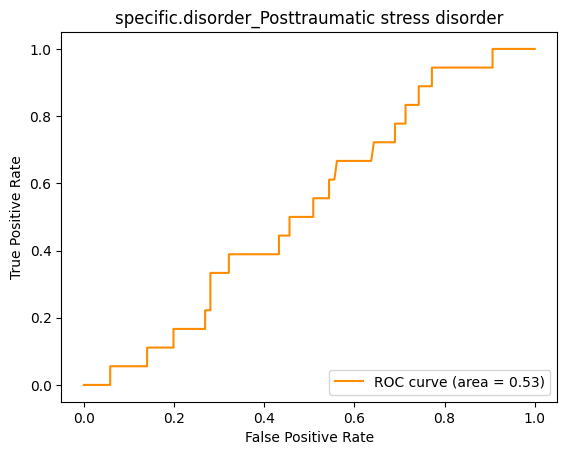

6/6 [==============================] - 0s 4ms/step


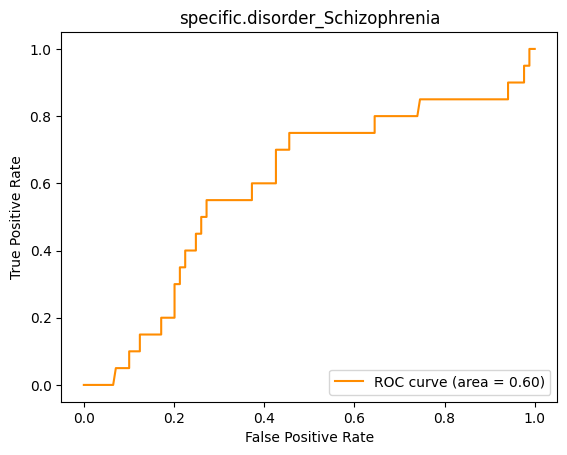

6/6 [==============================] - 0s 4ms/step


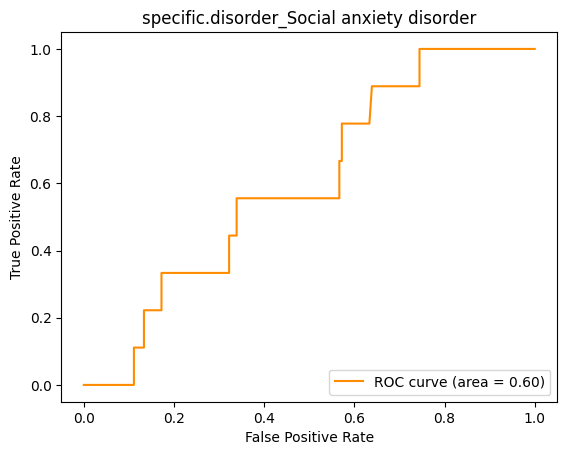

In [47]:
for i,category in enumerate(target_categories):
    y = y_test[category]
    y_pred = model.predict(X_test)
    y_pred = y_pred[:,i]
    fpr, tpr, _ = roc_curve(y, y_pred)
                        
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
    plt.legend(loc="lower right")
    plt.title(f"{category}")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    plt.show() 

# Most of the ROC curves are poor in performance. I will drop categories with little data

In [48]:
filename = 'EEG.machinelearing_data_BRMH.csv'
df = pd.read_csv(filename)
df.head(10)

,no.,sex,age,eeg.date,education,IQ,main.disorder,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
0,1,M,57.0,2012.8.30,NaN,NaN,Addictive disorder,Alcohol use disorder,35.998557,21.717375,...,55.989192,16.739679,23.452271,45.678820,30.167520,16.918761,48.850427,9.422630,34.507082,28.613029
1,2,M,37.0,2012.9.6,6.0,120.0,Addictive disorder,Alcohol use disorder,13.425118,11.002916,...,45.595619,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261
2,3,M,32.0,2012.9.10,16.0,113.0,Addictive disorder,Alcohol use disorder,29.941780,27.544684,...,99.475453,70.654171,39.131547,69.920996,71.063644,38.534505,69.908764,27.180532,64.803155,31.485799
3,4,M,35.0,2012.10.8,18.0,126.0,Addictive disorder,Alcohol use disorder,21.496226,21.846832,...,59.986561,63.822201,36.478254,47.117006,84.658376,24.724096,50.299349,35.319695,79.822944,41.141873
4,5,M,36.0,2012.10.18,16.0,112.0,Addictive disorder,Alcohol use disorder,37.775667,33.607679,...,61.462720,59.166097,51.465531,58.635415,80.685608,62.138436,75.888749,61.003944,87.455509,70.531662
5,6,F,24.0,2012.11.21,14.0,105.0,Addictive disorder,Alcohol use disorder,13.482096,14.095855,...,92.841723,82.302355,83.938567,88.213886,90.972026,77.443894,89.545596,72.579530,89.462863,86.127823
6,7,F,26.0,2012.12.3,16.0,103.0,Addictive disorder,Alcohol use disorder,21.780747,26.655328,...,73.017845,50.593309,56.250644,46.572808,69.617082,51.808149,56.495169,52.526873,62.801103,56.710212
7,8,M,23.0,2013.1.17,12.0,104.0,Addictive disorder,Alcohol use disorder,11.704212,10.600361,...,91.645799,63.962652,58.120225,69.767127,80.165627,58.648915,79.533814,35.510554,45.811328,60.417464
8,9,M,24.0,2013.2.15,17.0,89.0,Addictive disorder,Alcohol use disorder,8.531635,8.668278,...,47.703314,34.685504,38.526848,75.189718,47.003045,32.248734,77.707001,33.095903,67.985045,65.377007
9,10,F,30.0,2013.2.8,12.0,98.0,Addictive disorder,Alcohol use disorder,14.853668,12.614058,...,83.249851,39.820829,70.283171,64.150040,63.783769,45.423004,61.922878,19.639653,54.220350,53.456534


In [49]:
df.drop(['no.','sex','eeg.date','education','IQ','main.disorder'], axis = 1, inplace = True)
df.dropna(axis = 1, inplace=True)
df.head(10)

,age,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,AB.A.delta.g.F8,AB.A.delta.h.T3,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
0,57.0,Alcohol use disorder,35.998557,21.717375,21.518280,26.825048,26.611516,25.732649,16.563408,29.891368,...,55.989192,16.739679,23.452271,45.678820,30.167520,16.918761,48.850427,9.422630,34.507082,28.613029
1,37.0,Alcohol use disorder,13.425118,11.002916,11.942516,15.272216,14.151570,12.456034,8.436832,9.975238,...,45.595619,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261
2,32.0,Alcohol use disorder,29.941780,27.544684,17.150159,23.608960,27.087811,13.541237,16.523963,12.775574,...,99.475453,70.654171,39.131547,69.920996,71.063644,38.534505,69.908764,27.180532,64.803155,31.485799
3,35.0,Alcohol use disorder,21.496226,21.846832,17.364316,13.833701,14.100954,13.100939,14.613650,8.063191,...,59.986561,63.822201,36.478254,47.117006,84.658376,24.724096,50.299349,35.319695,79.822944,41.141873
4,36.0,Alcohol use disorder,37.775667,33.607679,21.865556,21.771413,22.854536,21.456377,15.969042,9.434306,...,61.462720,59.166097,51.465531,58.635415,80.685608,62.138436,75.888749,61.003944,87.455509,70.531662
5,24.0,Alcohol use disorder,13.482096,14.095855,12.854630,11.727480,13.128924,11.627138,14.978119,6.899770,...,92.841723,82.302355,83.938567,88.213886,90.972026,77.443894,89.545596,72.579530,89.462863,86.127823
6,26.0,Alcohol use disorder,21.780747,26.655328,17.687564,28.340610,34.357498,30.449621,17.911285,10.661723,...,73.017845,50.593309,56.250644,46.572808,69.617082,51.808149,56.495169,52.526873,62.801103,56.710212
7,23.0,Alcohol use disorder,11.704212,10.600361,9.208001,16.623509,16.483356,14.705948,9.939374,7.620754,...,91.645799,63.962652,58.120225,69.767127,80.165627,58.648915,79.533814,35.510554,45.811328,60.417464
8,24.0,Alcohol use disorder,8.531635,8.668278,6.936891,7.355228,9.103691,7.529840,7.113072,4.797183,...,47.703314,34.685504,38.526848,75.189718,47.003045,32.248734,77.707001,33.095903,67.985045,65.377007
9,30.0,Alcohol use disorder,14.853668,12.614058,21.729442,19.998095,17.081762,28.024453,12.010140,14.668044,...,83.249851,39.820829,70.283171,64.150040,63.783769,45.423004,61.922878,19.639653,54.220350,53.456534


In [50]:
disorders = df.groupby("specific.disorder").size()

In [51]:
disorders

specific.disorder
Acute stress disorder              38
Adjustment disorder                38
Alcohol use disorder               93
Behavioral addiction disorder      93
Bipolar disorder                   67
Depressive disorder               199
Healthy control                    95
Obsessive compulsitve disorder     46
Panic disorder                     59
Posttraumatic stress disorder      52
Schizophrenia                     117
Social anxiety disorder            48
dtype: int64

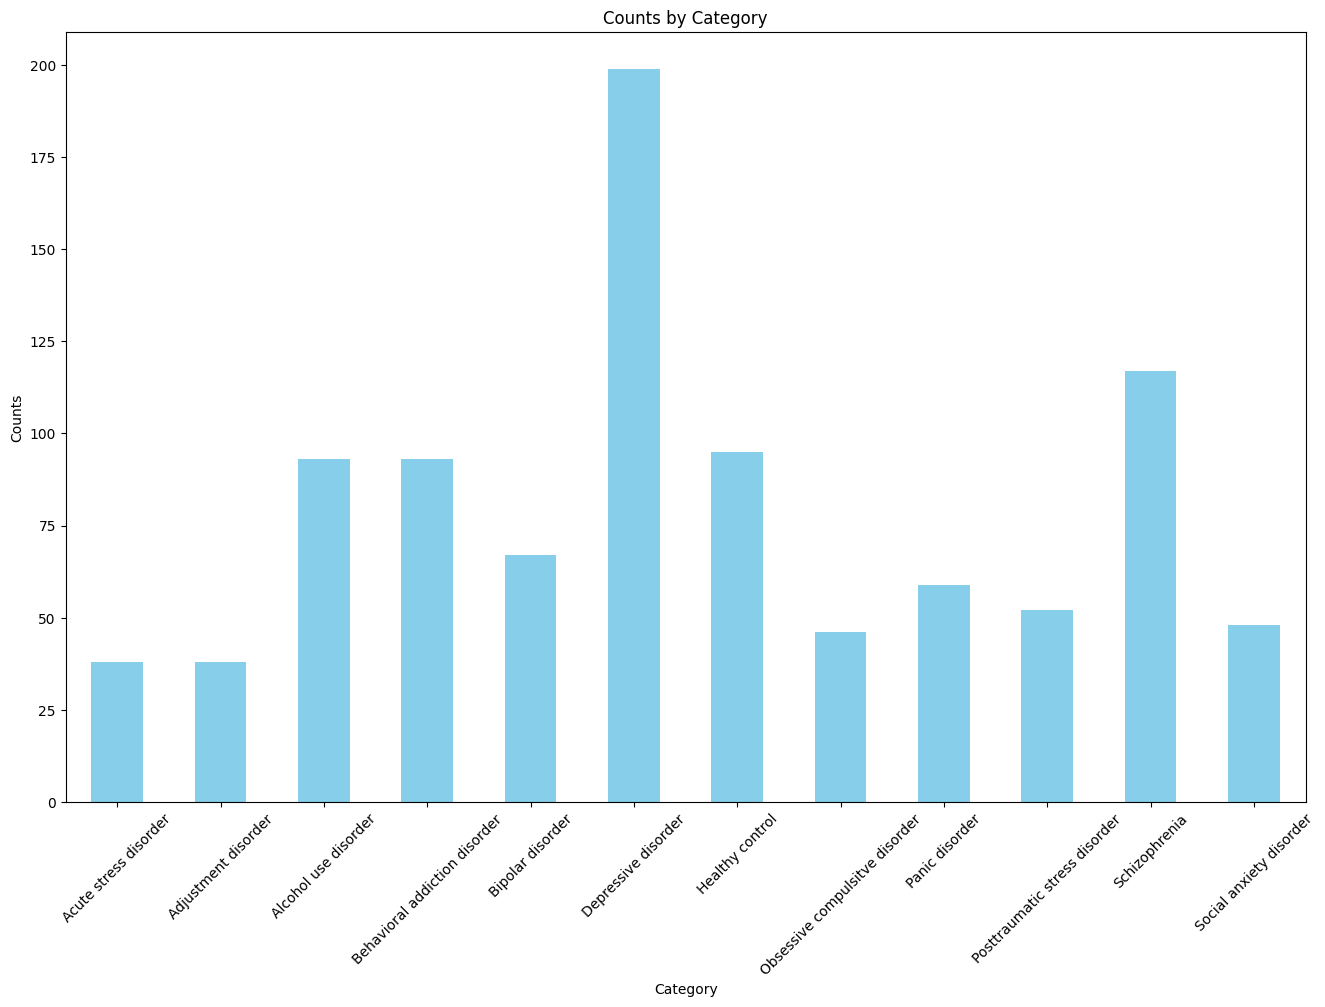

In [52]:
disorders.plot(kind='bar', color='skyblue', figsize=(16, 10))
plt.title('Counts by Category')
plt.xlabel('Category')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.show()

# Will drop acute stress disorder, adjustment disorder, obsessive compulsive disorder, and social anxiety. 

In [53]:
new_df = df[~df['specific.disorder'].isin(['Acute stress disorder', 'Adjustment disorder', 'Obsessive compulsitve disorder','Social anxiety disorder'])]

In [54]:
disorders = new_df.groupby("specific.disorder").size()

In [55]:
disorders

specific.disorder
Alcohol use disorder              93
Behavioral addiction disorder     93
Bipolar disorder                  67
Depressive disorder              199
Healthy control                   95
Panic disorder                    59
Posttraumatic stress disorder     52
Schizophrenia                    117
dtype: int64

In [56]:
disorders.size

8

In [57]:
new_df = pd.get_dummies(new_df, columns=['specific.disorder'])

In [58]:
new_df.head(10)


,age,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,AB.A.delta.g.F8,AB.A.delta.h.T3,AB.A.delta.i.C3,...,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2,specific.disorder_Alcohol use disorder,specific.disorder_Behavioral addiction disorder,specific.disorder_Bipolar disorder,specific.disorder_Depressive disorder,specific.disorder_Healthy control,specific.disorder_Panic disorder,specific.disorder_Posttraumatic stress disorder,specific.disorder_Schizophrenia
0,57.0,35.998557,21.717375,21.518280,26.825048,26.611516,25.732649,16.563408,29.891368,22.402246,...,34.507082,28.613029,True,False,False,False,False,False,False,False
1,37.0,13.425118,11.002916,11.942516,15.272216,14.151570,12.456034,8.436832,9.975238,14.834740,...,57.831848,43.463261,True,False,False,False,False,False,False,False
2,32.0,29.941780,27.544684,17.150159,23.608960,27.087811,13.541237,16.523963,12.775574,21.686306,...,64.803155,31.485799,True,False,False,False,False,False,False,False
3,35.0,21.496226,21.846832,17.364316,13.833701,14.100954,13.100939,14.613650,8.063191,11.015078,...,79.822944,41.141873,True,False,False,False,False,False,False,False
4,36.0,37.775667,33.607679,21.865556,21.771413,22.854536,21.456377,15.969042,9.434306,15.244523,...,87.455509,70.531662,True,False,False,False,False,False,False,False
5,24.0,13.482096,14.095855,12.854630,11.727480,13.128924,11.627138,14.978119,6.899770,9.751346,...,89.462863,86.127823,True,False,False,False,False,False,False,False
6,26.0,21.780747,26.655328,17.687564,28.340610,34.357498,30.449621,17.911285,10.661723,30.532273,...,62.801103,56.710212,True,False,False,False,False,False,False,False
7,23.0,11.704212,10.600361,9.208001,16.623509,16.483356,14.705948,9.939374,7.620754,17.939082,...,45.811328,60.417464,True,False,False,False,False,False,False,False
8,24.0,8.531635,8.668278,6.936891,7.355228,9.103691,7.529840,7.113072,4.797183,6.656886,...,67.985045,65.377007,True,False,False,False,False,False,False,False
9,30.0,14.853668,12.614058,21.729442,19.998095,17.081762,28.024453,12.010140,14.668044,34.792466,...,54.220350,53.456534,True,False,False,False,False,False,False,False


In [59]:
new_df.drop(['age'], axis = 1, inplace = True) #Drop the age column

In [60]:
target_categories = [i for i in new_df.columns if "specific" in i] #Checking all of the categories to estimate.
target_categories

['specific.disorder_Alcohol use disorder',
 'specific.disorder_Behavioral addiction disorder',
 'specific.disorder_Bipolar disorder',
 'specific.disorder_Depressive disorder',
 'specific.disorder_Healthy control',
 'specific.disorder_Panic disorder',
 'specific.disorder_Posttraumatic stress disorder',
 'specific.disorder_Schizophrenia']

In [61]:
X_names_2 = [col for col in new_df.columns if col not in target_categories]

In [62]:
X = new_df[X_names_2]

In [63]:
y = new_df[target_categories]
y = y.astype(float)

In [64]:
y

,specific.disorder_Alcohol use disorder,specific.disorder_Behavioral addiction disorder,specific.disorder_Bipolar disorder,specific.disorder_Depressive disorder,specific.disorder_Healthy control,specific.disorder_Panic disorder,specific.disorder_Posttraumatic stress disorder,specific.disorder_Schizophrenia
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
940,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
941,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
942,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
943,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# Will reuse latest model with regulariztion tweaks

In [65]:
from tensorflow.keras.regularizers import l1_l2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential([
    Dense(1024, activation='relu', input_dim=X.shape[1]),
    BatchNormalization(),  
    Dropout(0.3),
    Dense(512, activation='relu',kernel_regularizer=l1_l2(l1=3e-3, l2=3e-4)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(256, activation='relu',kernel_regularizer=l1_l2(l1=3e-3, l2=3e-4)),
    Dense(y.shape[1], activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

X_train_tf = tf.convert_to_tensor(X_train, dtype=float)
y_train_tf = tf.convert_to_tensor(y_train,dtype=float)

history = model.fit(X_train_tf, y_train_tf,validation_data=(X_test,y_test), epochs=150, batch_size = 1024)

X_test_tf = tf.convert_to_tensor(X_test, dtype=float)
y_test_tf = tf.convert_to_tensor(y_test, dtype=bool)
y_pred = model.predict(X_test_tf)

Epoch 1/150
1/1 [==============================] - 2s 2s/step - loss: 67.7874 - accuracy: 0.0968 - val_loss: 68.8949 - val_accuracy: 0.0903
Epoch 2/150
1/1 [==============================] - 0s 85ms/step - loss: 65.7180 - accuracy: 0.1194 - val_loss: 66.3642 - val_accuracy: 0.0968
Epoch 3/150
1/1 [==============================] - 0s 87ms/step - loss: 63.7141 - accuracy: 0.1581 - val_loss: 63.9756 - val_accuracy: 0.1032
Epoch 4/150
1/1 [==============================] - 0s 86ms/step - loss: 61.7661 - accuracy: 0.1548 - val_loss: 61.6381 - val_accuracy: 0.1032
Epoch 5/150
1/1 [==============================] - 0s 83ms/step - loss: 59.8731 - accuracy: 0.1919 - val_loss: 59.4850 - val_accuracy: 0.0968
Epoch 6/150
1/1 [==============================] - 0s 84ms/step - loss: 58.0182 - accuracy: 0.2113 - val_loss: 57.4629 - val_accuracy: 0.0839
Epoch 7/150
1/1 [==============================] - 0s 86ms/step - loss: 56.2111 - accuracy: 0.2161 - val_loss: 55.4690 - val_accuracy: 0.0774
Epoch 8/

# Metric Curves

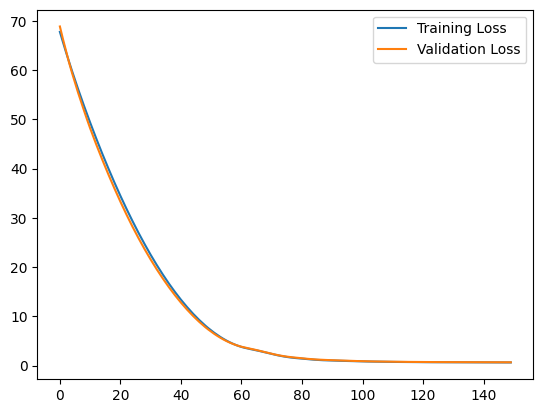

In [66]:
plt.plot(range(len(history.history["loss"])),history.history["loss"],label="Training Loss")
plt.plot(range(len(history.history["val_loss"])),history.history["val_loss"],label="Validation Loss")
plt.legend()

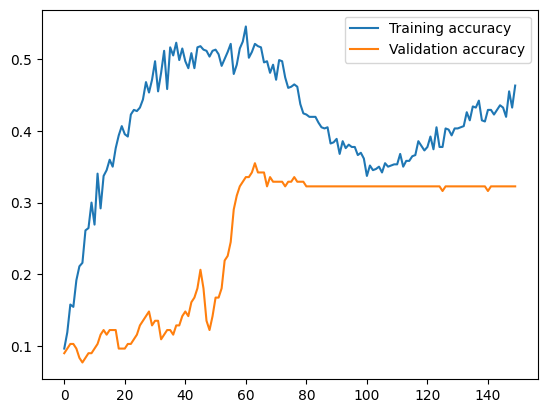

In [67]:
plt.plot(range(len(history.history["accuracy"])),history.history["accuracy"],label="Training accuracy")
plt.plot(range(len(history.history["val_accuracy"])),history.history["val_accuracy"],label="Validation accuracy")
plt.legend()

5/5 [==============================] - 0s 4ms/step


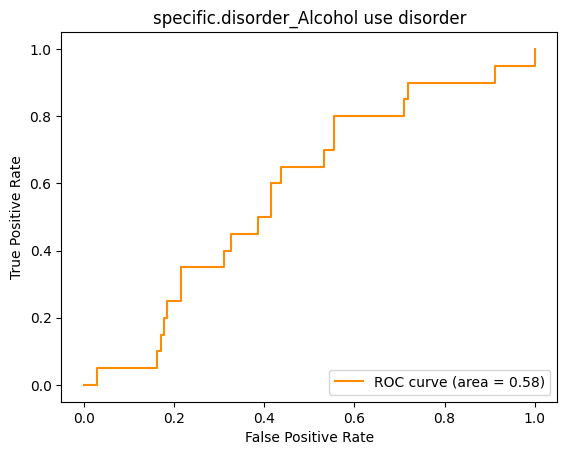

5/5 [==============================] - 0s 4ms/step


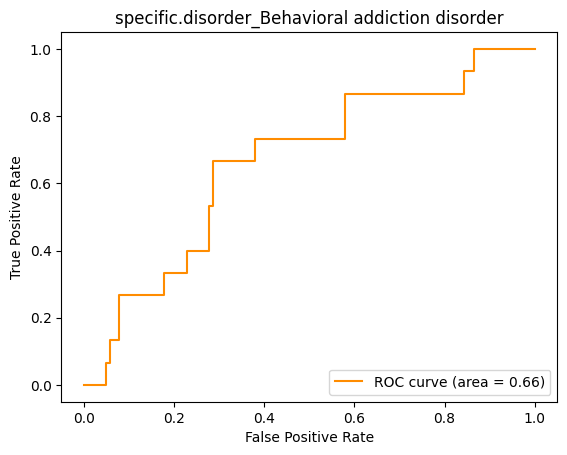

5/5 [==============================] - 0s 4ms/step


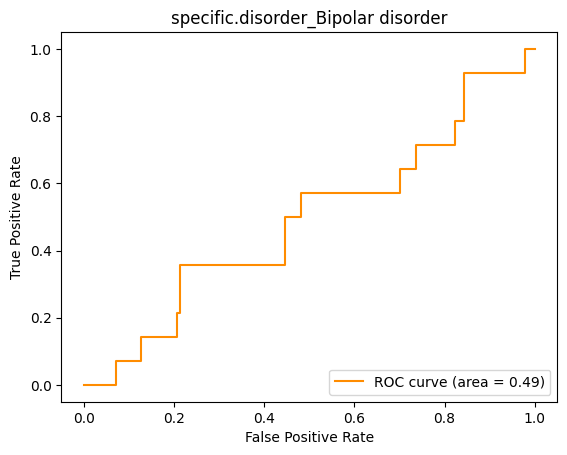

5/5 [==============================] - 0s 4ms/step


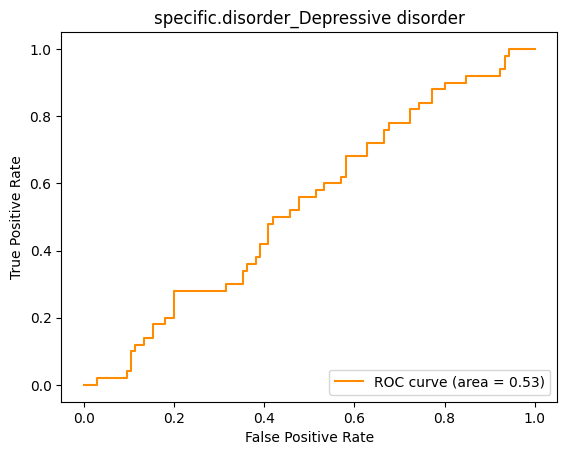

5/5 [==============================] - 0s 4ms/step


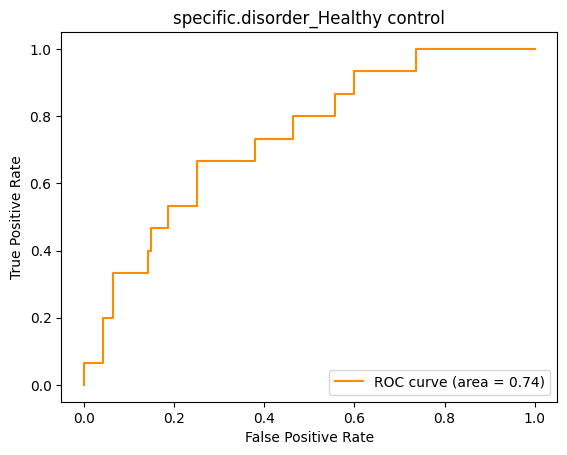

5/5 [==============================] - 0s 4ms/step


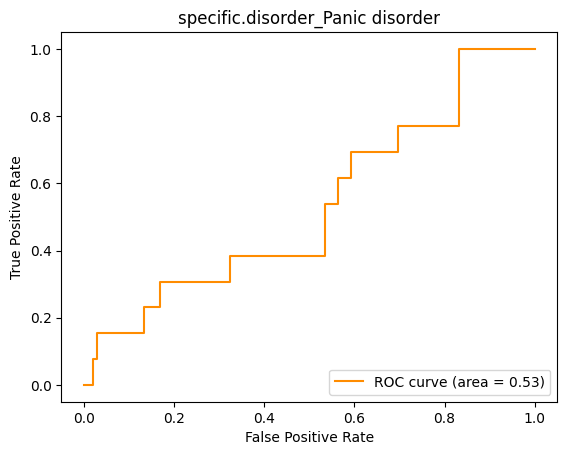

5/5 [==============================] - 0s 4ms/step


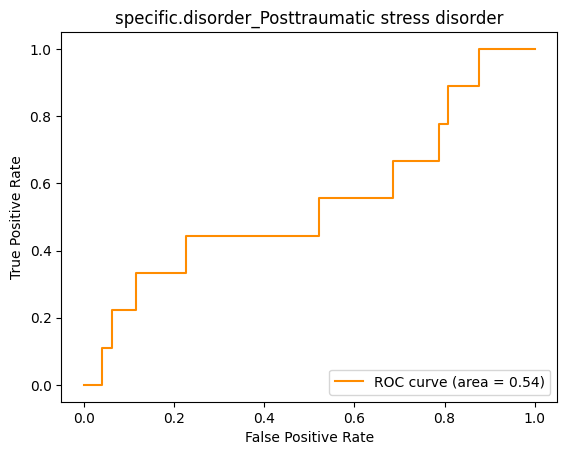

5/5 [==============================] - 0s 4ms/step


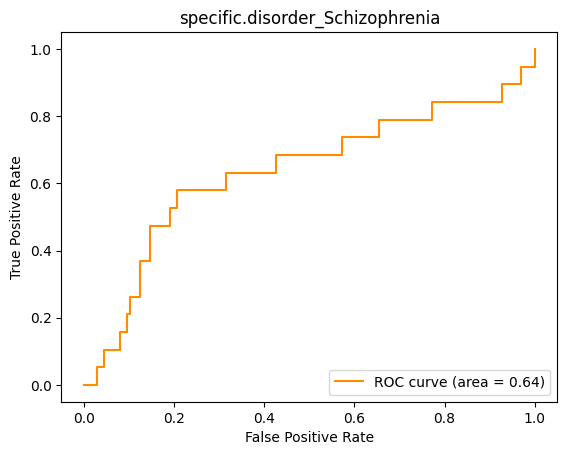

In [68]:
for i,category in enumerate(target_categories):
    y = y_test[category]
    y_pred = model.predict(X_test)
    y_pred = y_pred[:,i]
    fpr, tpr, _ = roc_curve(y, y_pred)
                        
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
    plt.legend(loc="lower right")
    plt.title(f"{category}")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    plt.show() 

# Better ROC curves than before but they are still poorly performing and are as good as random guesses. However, it seems like it learned something about the healthy control group which means there are features about the healthy controls not seen in those with mental health disorders.

# I will now aggregate every feature based on their frequency category, the categories are as follows, 

Delta: 0.5–4 Hz
Theta: 4–8 Hz
Alpha: 8–12 Hz
Beta: 12–30 Hz
Gamma: 30–100 Hz



In [69]:
#Obtain the mean of each frequency.

delta_names = [delta for delta in X.columns if "delta" in delta or delta in target_categories]
theta_names = [theta for theta in X.columns if "theta" in theta or theta in target_categories]
alpha_names = [alpha for alpha in X.columns if "alpha" in alpha or alpha in target_categories]
beta_names = [beta for beta in X.columns if "beta" in beta or beta in target_categories]
gamma_names = [gamma for gamma in X.columns if "gamma" in gamma or gamma in target_categories]

In [70]:
type(target_categories)

list

In [71]:
delta = df[[i for i in delta_names if i not in target_categories]].mean(axis = 1)
delta = pd.concat([delta,new_df[target_categories]], axis = 1)
theta = df[[i for i in theta_names if i not in target_categories]].mean(axis = 1)
theta = pd.concat([theta,new_df[target_categories]], axis = 1)
alpha = df[[i for i in alpha_names if i not in target_categories]].mean(axis = 1)
alpha = pd.concat([alpha,new_df[target_categories]], axis = 1)
beta = df[[i for i in beta_names if i not in target_categories]].mean(axis = 1)
beta = pd.concat([beta,new_df[target_categories]], axis = 1)
gamma = df[[i for i in gamma_names if i not in target_categories]].mean(axis = 1)
gamma = pd.concat([gamma,new_df[target_categories]], axis = 1)

In [72]:
gamma

,0,specific.disorder_Alcohol use disorder,specific.disorder_Behavioral addiction disorder,specific.disorder_Bipolar disorder,specific.disorder_Depressive disorder,specific.disorder_Healthy control,specific.disorder_Panic disorder,specific.disorder_Posttraumatic stress disorder,specific.disorder_Schizophrenia
0,17.166331,True,False,False,False,False,False,False,False
1,24.210353,True,False,False,False,False,False,False,False
2,52.610856,True,False,False,False,False,False,False,False
3,32.105368,True,False,False,False,False,False,False,False
4,62.303824,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
940,29.578856,False,False,False,False,True,False,False,False
941,45.844821,False,False,False,False,True,False,False,False
942,26.351982,False,False,False,False,True,False,False,False
943,31.220706,False,False,False,False,True,False,False,False


In [73]:
healthy_gamma = gamma[gamma['specific.disorder_Healthy control'] == True]
rest_gamma = gamma[gamma['specific.disorder_Healthy control'] == False]

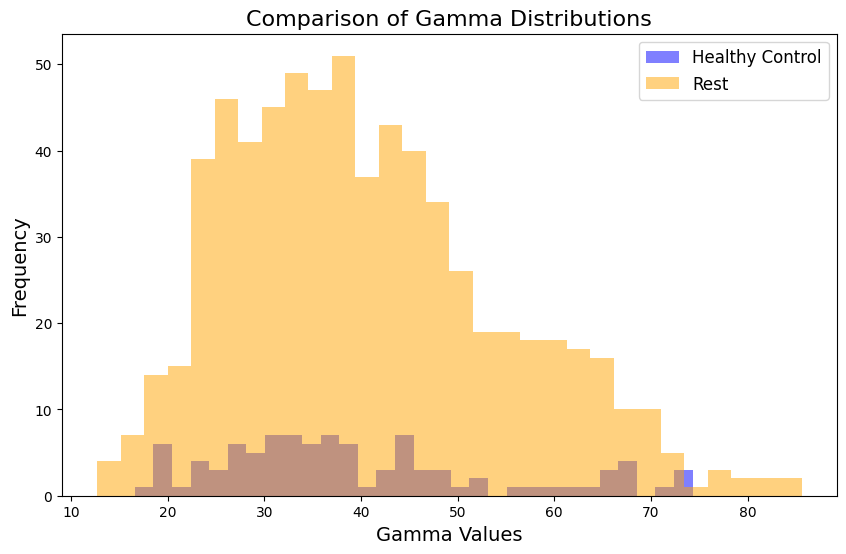

In [74]:
# Plot histograms
plt.figure(figsize=(10, 6))

# Histogram for healthy_gamma
plt.hist(healthy_gamma[0], bins=30, alpha=0.5, label='Healthy Control', color='blue')

# Histogram for rest_gamma
plt.hist(rest_gamma[0], bins=30, alpha=0.5, label='Rest', color='orange')

# Add labels, title, and legend
plt.xlabel('Gamma Values', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Comparison of Gamma Distributions', fontsize=16)
plt.legend(fontsize=12)
plt.show()

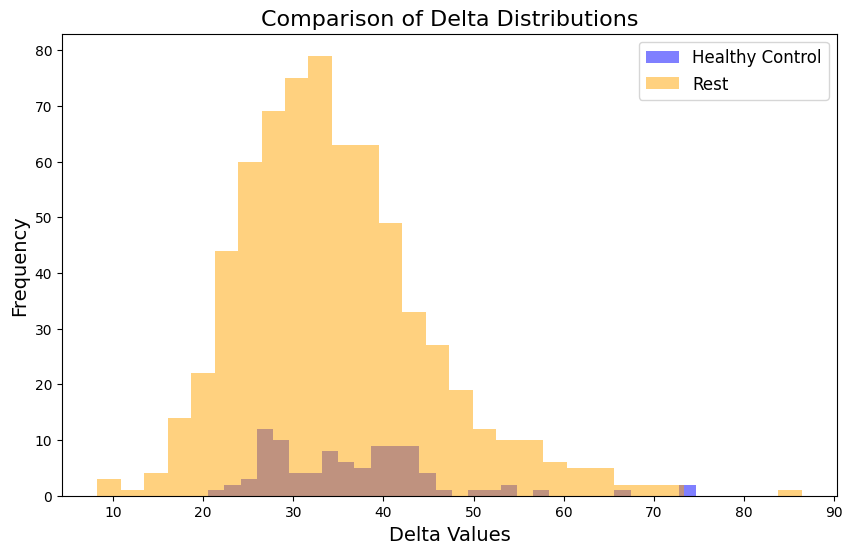

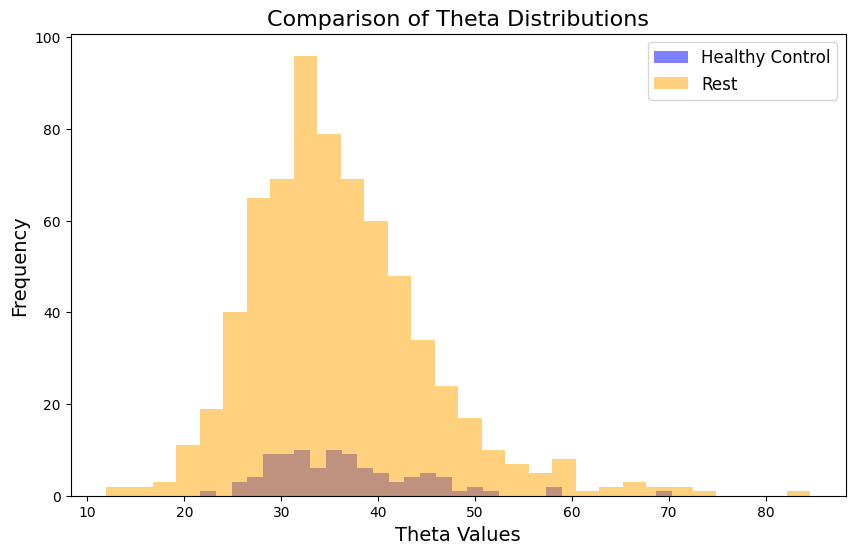

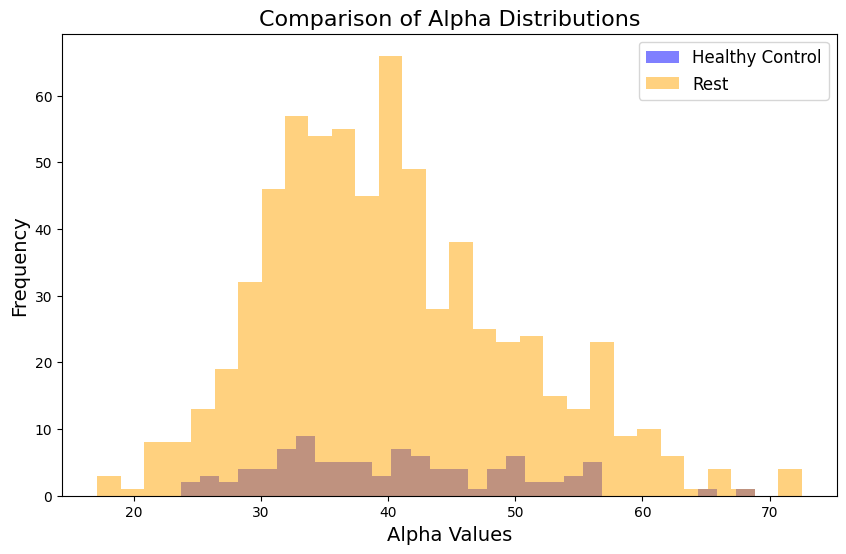

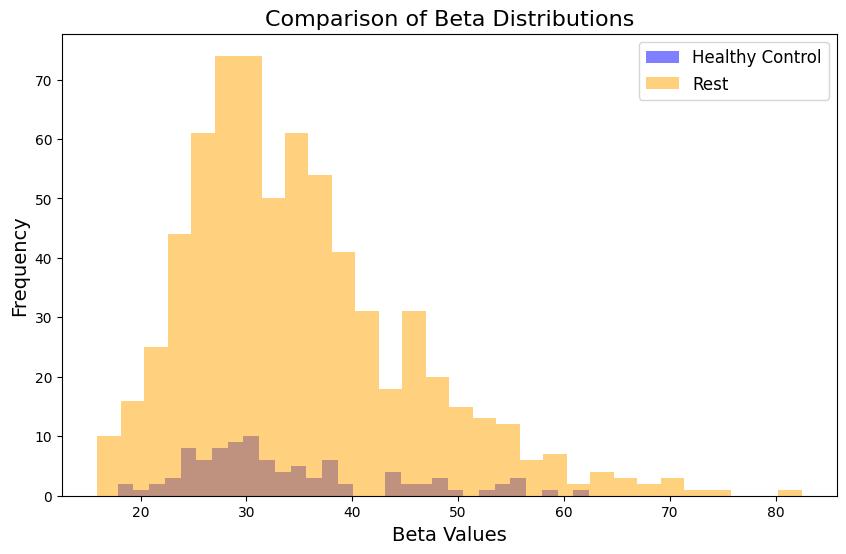

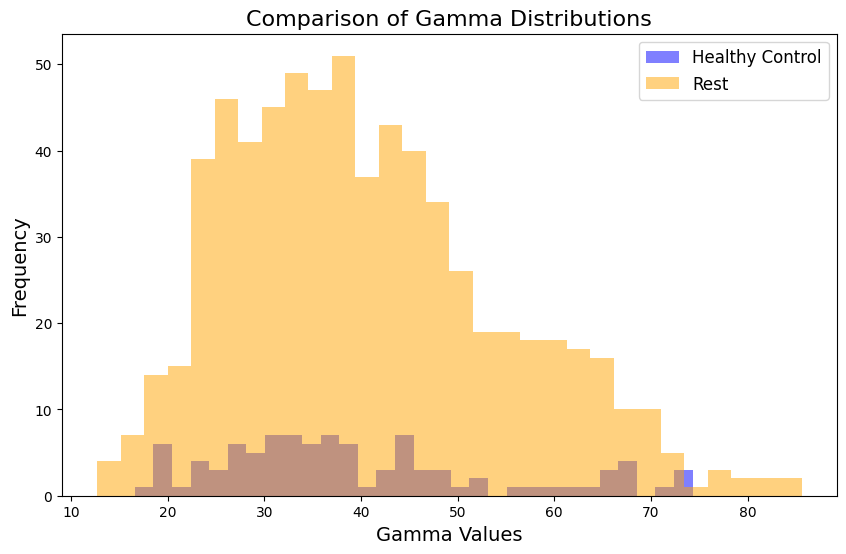

In [75]:
list_of_frequencies = [delta, theta, alpha, beta, gamma]
names_of_frequencies = ['Delta', 'Theta', 'Alpha', 'Beta', 'Gamma']
for i, freq in enumerate(list_of_frequencies):
    healthy = freq[freq['specific.disorder_Healthy control'] == True]
    rest = freq[freq['specific.disorder_Healthy control'] == False]
    
    # Plot histograms
    plt.figure(figsize=(10, 6))

    # Histogram for healthy_gamma
    plt.hist(healthy[0], bins=30, alpha=0.5, label='Healthy Control', color='blue')

    # Histogram for rest_gamma
    plt.hist(rest[0], bins=30, alpha=0.5, label='Rest', color='orange')

    # Add labels, title, and legend
    plt.xlabel(f'{names_of_frequencies[i]} Values', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.title(f'Comparison of {names_of_frequencies[i]} Distributions', fontsize=16)
    plt.legend(fontsize=12)
    plt.show() 

In [87]:
all_values = np.sort(np.concatenate([healthy_gamma[0], rest_gamma[0]]))

best_threshold = None
best_significance = 0
thresholds = []

for threshold in all_values:
    # Count signal (healthy) and background (rest) above threshold
    #N_signal = (np.abs(healthy_gamma[0] - np.mean(healthy_gamma[0])) < threshold).sum()
    #N_background = (np.abs(rest_gamma[0] - np.mean(rest_gamma[0])) < threshold).sum()

    N_signal = (healthy_gamma[0] < threshold).sum()
    N_background = (rest_gamma[0] < threshold).sum()

    # Compute significance
    if N_signal + N_background > 0:  # Avoid division by zero
        significance = N_signal / np.sqrt(N_signal + N_background)
    else:
        significance = 0

    # Update the best threshold if significance improves
    if significance > best_significance:
        best_significance = significance
        best_threshold = threshold

    # Store the thresholds and significance for visualization (optional)
    thresholds.append((threshold, significance))

# Output the optimal threshold and significance
print(f"Optimal Threshold: {best_threshold}")
print(f"Best Significance: {best_significance}")

Optimal Threshold: 75.87549336315793
Best Significance: 3.4347322487953895


In [80]:
healthy_beta = beta[beta['specific.disorder_Healthy control'] == True]
rest_beta = beta[beta['specific.disorder_Healthy control'] == False]

In [91]:
all_values = np.sort(np.concatenate([healthy_beta[0], rest_beta[0]]))

best_threshold = None
best_significance = 0
thresholds = []

for threshold in all_values:
    # Count signal (healthy) and background (rest) above threshold
    N_signal = (np.abs(healthy_beta[0] - np.mean(healthy_beta[0])) < threshold).sum()
    N_background = (np.abs(rest_beta[0] - np.mean(rest_beta[0])) < threshold).sum()

    #N_signal = (healthy_beta[0] > threshold).sum()
    #N_background = (rest_beta[0] > threshold).sum()

    # Compute significance
    if N_signal + N_background > 0:  # Avoid division by zero
        significance = N_signal / np.sqrt(N_signal + N_background)
    else:
        significance = 0

    # Update the best threshold if significance improves
    if significance > best_significance:
        best_significance = significance
        best_threshold = threshold

    # Store the thresholds and significance for visualization (optional)
    thresholds.append((threshold, significance))

# Output the optimal threshold and significance
print(f"Optimal Threshold: {best_threshold}")
print(f"Best Significance: {best_significance}")

Optimal Threshold: 28.483776692105284
Best Significance: 3.4392309177159834
